In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
print("Engine Successful")

Engine Successful


In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#SELECT max(date) FROM measurement

In [10]:
# Find the most recent date in the data set.
most_recent_date_str = session.query(func.max(measurement.date)).scalar()
most_recent_date_str

'2017-08-23'

In [11]:
# Convert to date object
most_recent_date = dt.date.fromisoformat(most_recent_date_str)
most_recent_date

datetime.date(2017, 8, 23)

In [12]:
# Calculate the date one year from the last date in data set.
previous_year = most_recent_date - dt.timedelta(days=365)
previous_year

datetime.date(2016, 8, 23)

In [13]:
precip = session.query(measurement.date, func.avg(measurement.prcp))\
    .filter(measurement.date >= previous_year).group_by(measurement.date)\
    .all()

precip

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

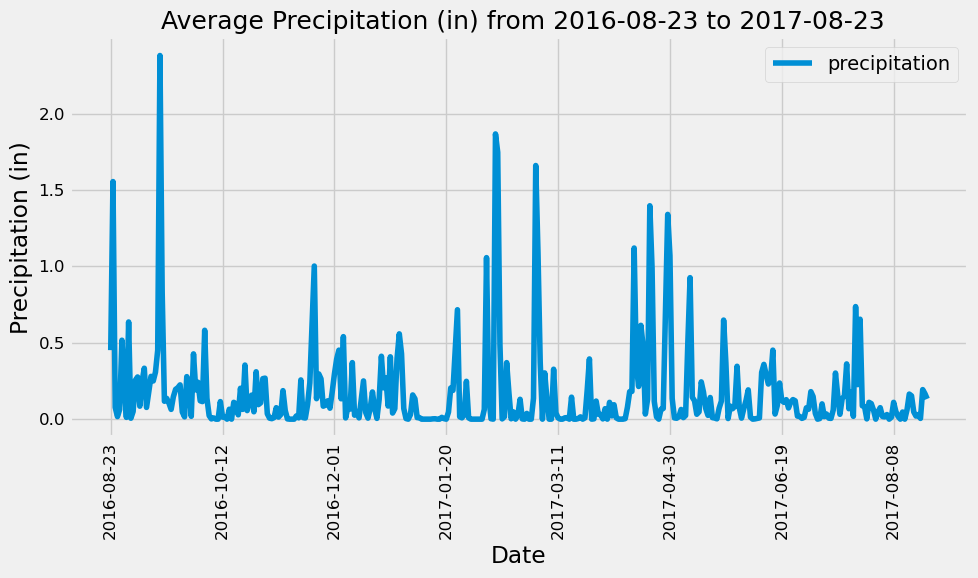

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the date and precipitation scores
precip = session.query(measurement.date, func.avg(measurement.prcp))\
    .filter(measurement.date >= previous_year).group_by(measurement.date)\
    .all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip, columns = ['date', 'prcp']).sort_values("date").set_index("date")                       
                       
                       
# Sort the dataframe by date
precip_df.rename(columns={"prcp":"precipitation"}, inplace=True)
precip_df.round({"precipitation":2})

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(figsize=(10,6), fontsize=12, rot=90)
plt.title(f" Average Precipitation (in) from {previous_year} to {most_recent_date}", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")

plt.tight_layout()
plt.show()


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station).count()
print(stations)

9


In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).\
   order_by(func.count(measurement.station).desc()).\
                  group_by(measurement.station).\
                  all()
active_station



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
most_active = active_station[0][0]
most_active

'USC00519281'

In [19]:
lowest_tobs = session.query(measurement.tobs, func.min(measurement.tobs))\
    .filter(measurement.station == most_active).scalar()


lowest_tobs

54.0

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
    lowest_temp = session.query(measurement.tobs, func.min(measurement.tobs))\
        .filter(measurement.station == most_active).scalar()

    highest_temp = session.query(measurement.tobs, func.max(measurement.tobs))\
        .filter(measurement.station == most_active).scalar()

    avg_temp = session.query(measurement.tobs, func.avg(measurement.tobs))\
        .filter(measurement.station == most_active).scalar()



    print([{lowest_temp} ,{highest_temp} , {avg_temp}])
#lowest_temp
#highest_temp
#avg_temp 



[{54.0}, {85.0}, {70.0}]


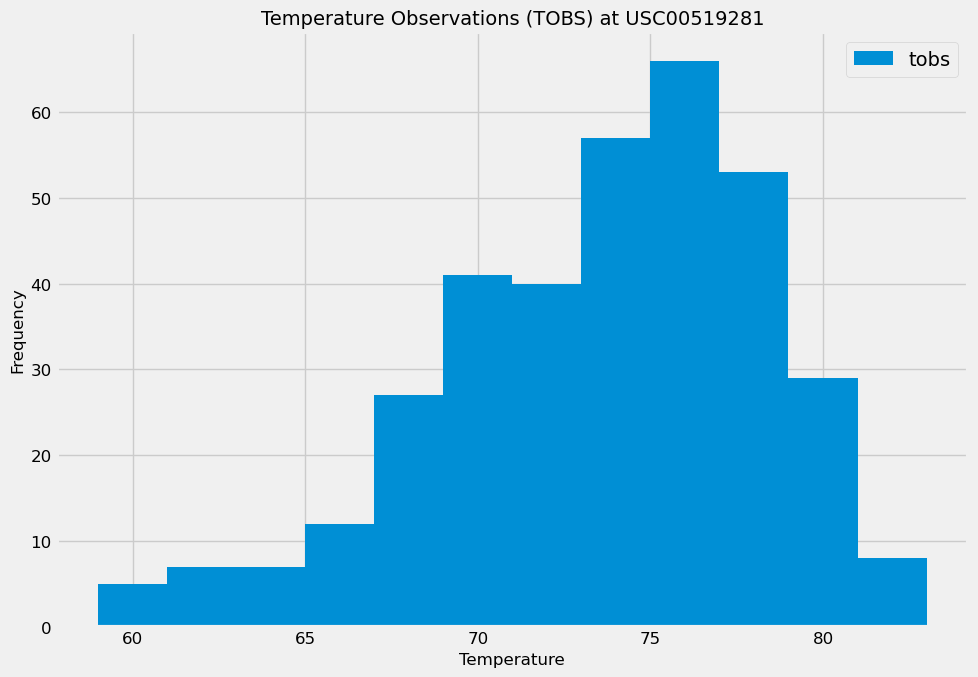

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_id = pd.DataFrame(session.query(measurement.tobs)\
    .filter(measurement.station == most_active, measurement.date >= previous_year ).all())

station_id.plot(kind="hist", figsize=(10,7), bins=12, legend=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Temperature", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Temperature Observations (TOBS) at {most_active}", fontsize=14)

plt.tight_layout()
plt.show()


# Close Session

In [23]:
# Close Session
session.close()